In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Read CSV file -- First column is index/header
df = pd.read_csv("data/data_part_1.csv", index_col=0)
print(f"Dimensions:")
print(f"Rows = {df.shape[0]} observations")
print(f"Columns = {df.shape[1]} variables")

Dimensions:
Rows = 12180 observations
Columns = 1741 variables


In [16]:
df.head(20)

,Anthocyanin content (μg/cm²),Boron content (mg/cm²),C content (mg/cm²),Ca content (mg/cm²),Carotenoid content (μg/cm²),Cellulose (mg/cm²),Chl content (μg/cm²),Copper content (mg/cm²),EWT (mg/cm²),Fiber (mg/cm²),...,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450
0,NaN,NaN,NaN,0.091526,NaN,NaN,34.047382,NaN,10.889923,NaN,...,0.035515,0.035214,0.034912,0.034611,0.034310,0.034008,0.033707,0.033405,0.033104,0.032803
1,NaN,NaN,NaN,0.038488,NaN,NaN,23.320021,NaN,10.270048,NaN,...,0.047333,0.047102,0.046871,0.046640,0.046409,0.046178,0.045947,0.045716,0.045485,0.045254
2,NaN,NaN,NaN,0.026577,NaN,NaN,27.098073,NaN,11.423791,NaN,...,0.027101,0.026860,0.026619,0.026379,0.026138,0.025897,0.025656,0.025415,0.025174,0.024933
3,NaN,NaN,NaN,0.013190,NaN,NaN,27.638014,NaN,13.132381,NaN,...,0.038942,0.038526,0.038110,0.037694,0.037278,0.036862,0.036446,0.036030,0.035614,0.035198
4,NaN,NaN,NaN,0.082163,NaN,NaN,23.159727,NaN,11.625371,NaN,...,0.049960,0.049475,0.048989,0.048504,0.048019,0.047534,0.047048,0.046563,0.046078,0.045593
5,NaN,NaN,NaN,0.022024,NaN,NaN,20.810395,NaN,10.573226,NaN,...,0.029485,0.028949,0.028413,0.027878,0.027342,0.026807,0.026271,0.025736,0.025200,0.024665
6,NaN,NaN,NaN,0.026577,NaN,NaN,27.098073,NaN,11.423791,NaN,...,0.027101,0.026860,0.026619,0.026379,0.026138,0.025897,0.025656,0.025415,0.025174,0.024933
7,NaN,NaN,NaN,0.099728,NaN,NaN,42.224701,NaN,15.882364,NaN,...,0.016490,0.016190,0.015890,0.015590,0.015290,0.014990,0.014690,0.014390,0.014090,0.013790
8,NaN,NaN,NaN,0.017747,NaN,NaN,26.448420,NaN,7.577363,NaN,...,0.038179,0.037800,0.037421,0.037042,0.036664,0.036285,0.035906,0.035528,0.035149,0.034770
9,NaN,NaN,NaN,0.019997,NaN,NaN,18.708539,NaN,5.814840,NaN,...,0.053531,0.052945,0.052358,0.051772,0.051186,0.050600,0.050014,0.049428,0.048842,0.048256


In [18]:
# Determine where traits end, and bands start
df.columns[19:21] 


Index(['Sulfur content (mg/cm²)', '400'], dtype='object')

In [19]:
df.columns[-1]

'2450'

**Note:** The dataset begins with 20 trait-related variables, followed by spectral bands starting at column 21, covering the wavelength range from 400 to 2450 nm.(although the description says that wavelengths are ranging from 450 to 2500 nm)  

**Note:** In this dataset, band names directly represent wavelengths in nanometers (e.g., "450" = 450 nm),so there is no need to map band numbers to wavelength values separately.

**Note:** In the first dataset there are 20 traits whereas in the dataset part 2 there are 38 traits.

In [20]:
# Split variables as traits and bands
traits = df.columns[:20]
bands = df.columns[20:]
# We can conclude that there are;
print(f"Number of Observations: {df.shape[0]}")
print(f"Number of Traits: {len(traits)}")
print(f"Wavelength range: {bands[0]} - {bands[-1]}")# range = wavelength in this dataset

Number of Observations: 12180
Number of Traits: 20
Wavelength range: 400 - 2450


In [7]:
# Missing value analysis for traits
traits_null_counts = df[traits].isnull().sum()
traits_null_pct = df[traits].isnull().mean() * 100

trait_missing = pd.DataFrame({
    'Trait': traits,
    'MissingCount': traits_null_counts.values,
    'MissingPercent': traits_null_pct.values.round(2)
}).sort_values(by='MissingCount', ascending=False)

print(trait_missing)

                           Trait  MissingCount  MissingPercent
0   Anthocyanin content (μg/cm²)         11614           95.35
14    Manganese content (mg/cm²)          8833           72.52
18    Potassium content (mg/cm²)          8786           72.13
19       Sulfur content (mg/cm²)          8530           70.03
10                   LAI (m²/m²)          8470           69.54
3            Ca content (mg/cm²)          8465           69.50
1         Boron content (mg/cm²)          8366           68.69
16                  NSC (mg/cm²)          8351           68.56
7        Copper content (mg/cm²)          8316           68.28
13    Magnesium content (mg/cm²)          8263           67.84
17   Phosphorus content (mg/cm²)          8187           67.22
9                 Fiber (mg/cm²)          7983           65.54
5             Cellulose (mg/cm²)          7918           65.01
4    Carotenoid content (μg/cm²)          7916           64.99
12               Lignin (mg/cm²)          7872         

**Note**: This table will be important in the following steps, as we will need to select five traits.

In [22]:
# Check how many spectral bands are completely empty
bands_null_counts = df[bands].isnull().sum()
fully_missing_bands = (bands_null_counts == df.shape[0]).sum()
print(f"Number of completely missing bands: {fully_missing_bands}")

Number of completely missing bands: 0


**Note:** There are no missing bands

In [9]:
# Summary for traits
trait_stats = df[traits].describe().T 
trait_stats = trait_stats.round(4)

trait_summary = trait_stats[["mean", "std", "min", "50%", "max"]]
trait_summary.rename(columns={"50%": "median"}, inplace=True)

print(trait_summary.head(20))

                                  mean      std     min   median       max
Anthocyanin content (μg/cm²)    1.2563   0.4169  0.5610   1.2158    2.9811
Boron content (mg/cm²)          0.0004   0.0003  0.0000   0.0004    0.0023
C content (mg/cm²)              6.6800   4.9217  0.1028   4.7997   37.2915
Ca content (mg/cm²)             0.1158   0.1027  0.0007   0.0864    0.9887
Carotenoid content (μg/cm²)     9.2077   2.9150  1.1826   8.6810   21.5673
Cellulose (mg/cm²)              2.6377   1.9970  0.3499   1.8892   15.2234
Chl content (μg/cm²)           42.3512  13.7288  4.4483  42.5941   98.3887
Copper content (mg/cm²)         0.0001   0.0000  0.0000   0.0001    0.0003
EWT (mg/cm²)                   16.2212  10.4858  0.2268  12.1548   80.6201
Fiber (mg/cm²)                  5.9901   4.9310  0.1353   3.9868   29.8066
LAI (m²/m²)                     3.3469   1.5530  0.0633   3.2743    7.6700
LMA (g/m²)                    108.5145  79.7602  5.7191  84.5500  663.8073
Lignin (mg/cm²)          

/var/folders/_q/9bb35y7928b8cwm8khhrd7900000gn/T/ipykernel_84736/2127897588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trait_summary.rename(columns={"50%": "median"}, inplace=True)


In [10]:
# For some traits, standard devaiations are high - must be considered in reporting part

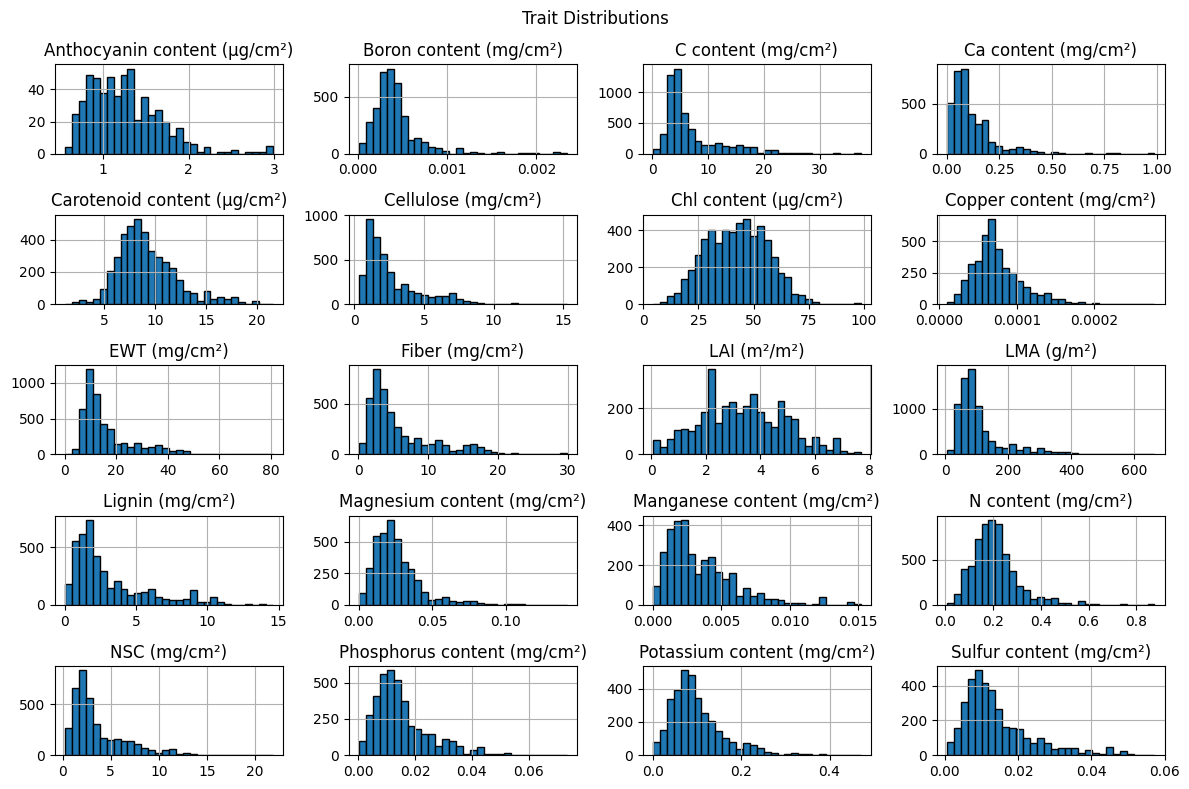

In [11]:
# Histograms for traits
df[traits].hist(figsize=(12,8), bins=30, edgecolor='black')
plt.suptitle('Trait Distributions')
plt.tight_layout()
plt.show()

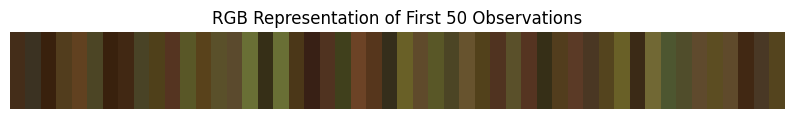

In [12]:
# Converting wavelengths to RGB, then visualize
wavelengths = bands.astype(int) # from '450' => 450

spectral_data = df[bands].values

# RGB range
def to_rgb(wmin, wmax): # RGB range
    return (wavelengths >= wmin) & (wavelengths <= wmax)

range_red = to_rgb(625, 740)  # https://en.wikipedia.org/wiki/Green
range_green = to_rgb(495, 570)# https://en.wikipedia.org/wiki/Green
range_blue = to_rgb(450, 495) # https://en.wikipedia.org/wiki/Blue

# Findind the RGB matrix
rgb_data = np.stack([
    np.nanmean(spectral_data[:, range_red], axis=1),
    np.nanmean(spectral_data[:, range_green], axis=1),
    np.nanmean(spectral_data[:, range_blue], axis=1)
], axis=1)

# Min-max normalization (0-1)
rgb_normalized = np.zeros_like(rgb_data)
for i in range(3):  # R, G, B
    channel = rgb_data[:, i]
    rgb_normalized[:, i] = (channel - np.nanmin(channel)) / (np.nanmax(channel) - np.nanmin(channel))

# Visualization for the first 50 Observations
plt.figure(figsize=(10, 1))
plt.imshow([rgb_normalized[0:50]], aspect='auto')
plt.title("RGB Representation of First 50 Observations")
plt.axis('off')
plt.show()

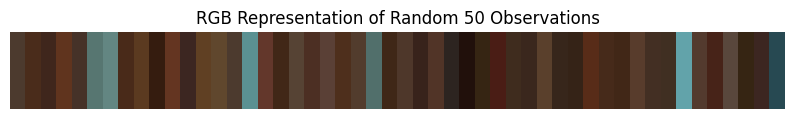

In [13]:
plt.figure(figsize=(10, 1))
plt.imshow([rgb_normalized[1300:1350]], aspect='auto')
plt.title("RGB Representation of Random 50 Observations")
plt.axis('off')
plt.show()

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pca import pca

In [ ]:
# Separating traits and bands dataframes
traits_df = df[traits].copy()
bands_df = df[bands].copy()

In [37]:
wavelengths = [int(i) for i in bands_df.columns.to_list()]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bands_df)

print("Data standardized successfully")
print(f"Mean after scaling: {X_scaled.mean():.6f}")
print(f"Std after scaling: {X_scaled.std():.6f}")

Data standardized successfully
Mean after scaling: -0.000000
Std after scaling: 1.000000


In [142]:
print("\n" + "="*50)
print("3. EDA PRINCIPAL COMPONENT ANALYSIS")
print("="*50)


3. EDA PRINCIPAL COMPONENT ANALYSIS


In [143]:
# Calculate correlation matrix (sample a subset for visualization if too large)
corr_matrix = bands_df.corr()
print("Correlation matrix calculated for all wavelengths")

Correlation matrix calculated for all wavelengths


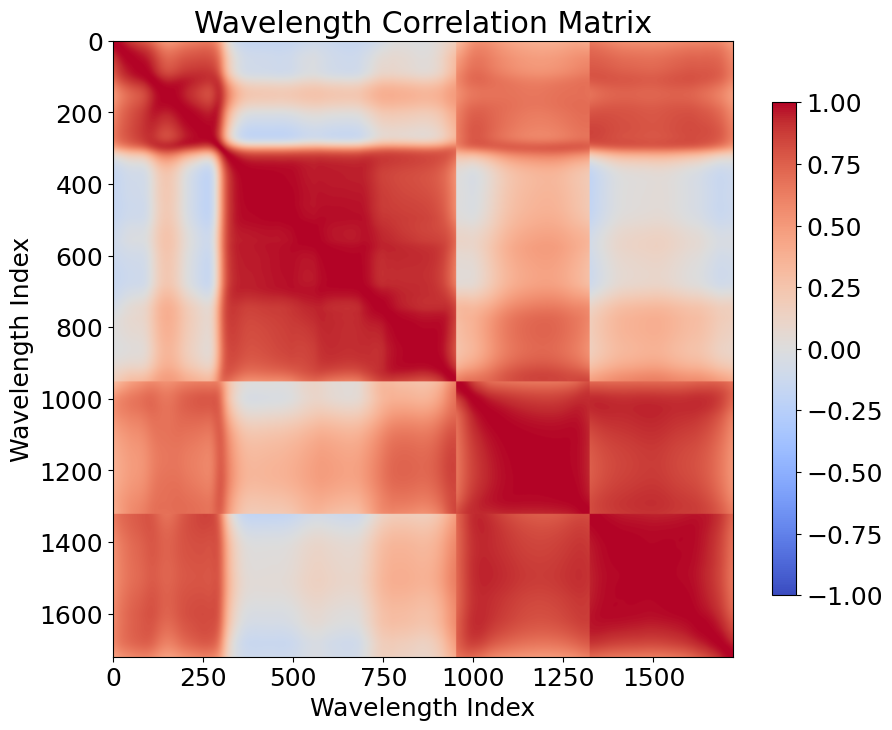

In [146]:
fig = plt.figure(figsize=(10, 8))
# 3. Correlation Heatmap
ax3 = plt.plot(1, 3, 3)
im = plt.imshow(corr_matrix.values, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.title('Wavelength Correlation Matrix')
plt.xlabel('Wavelength Index')
plt.ylabel('Wavelength Index')
plt.colorbar(im, shrink=0.8)

In [166]:
model = pca(normalize=False, n_components=10)
# Fit transform and include the column labels and row labels
results = model.fit_transform(X_scaled, col_labels=wavelengths)

[14-09-2025 05:32:21] [pca.pca] [INFO] Row labels are auto-completed.
[14-09-2025 05:32:21] [pca.pca] [INFO] The PCA reduction is performed on the 1721 columns of the input dataframe.
[14-09-2025 05:32:21] [pca.pca] [INFO] Fit using PCA.
[14-09-2025 05:32:22] [pca.pca] [INFO] Compute loadings and PCs.
[14-09-2025 05:32:22] [pca.pca] [INFO] Compute explained variance.
[14-09-2025 05:32:22] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[14-09-2025 05:32:23] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[14-09-2025 05:32:23] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]


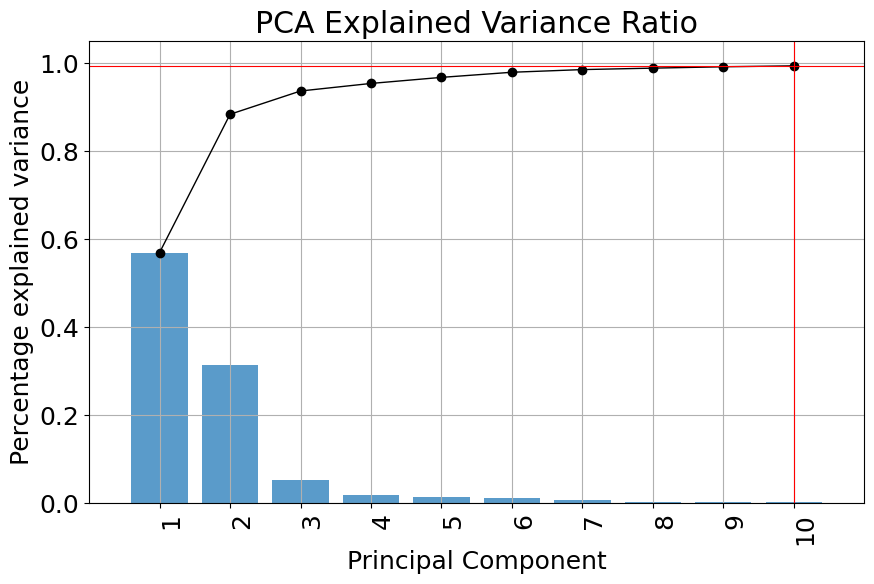

In [187]:
# Make plot
fig, ax = model.plot(figsize=(10,6), title="PCA Explained Variance Ratio")

[14-09-2025 05:59:11] [pca.pca] [INFO] Plot PC1 vs PC2 with loadings.
[14-09-2025 05:59:11] [scatterd.scatterd] [INFO] Create scatterplot


,PC,feature,loading,type
0,PC1,1746,0.030851,best
1,PC2,869,0.038423,best
2,PC3,521,0.053513,best
3,PC4,2450,0.083054,best
4,PC5,400,0.110784,best
...,...,...,...,...
1717,PC4,2445,0.081163,weak
1718,PC4,2446,0.081562,weak
1719,PC4,2447,0.081950,weak
1720,PC4,2448,0.082329,weak


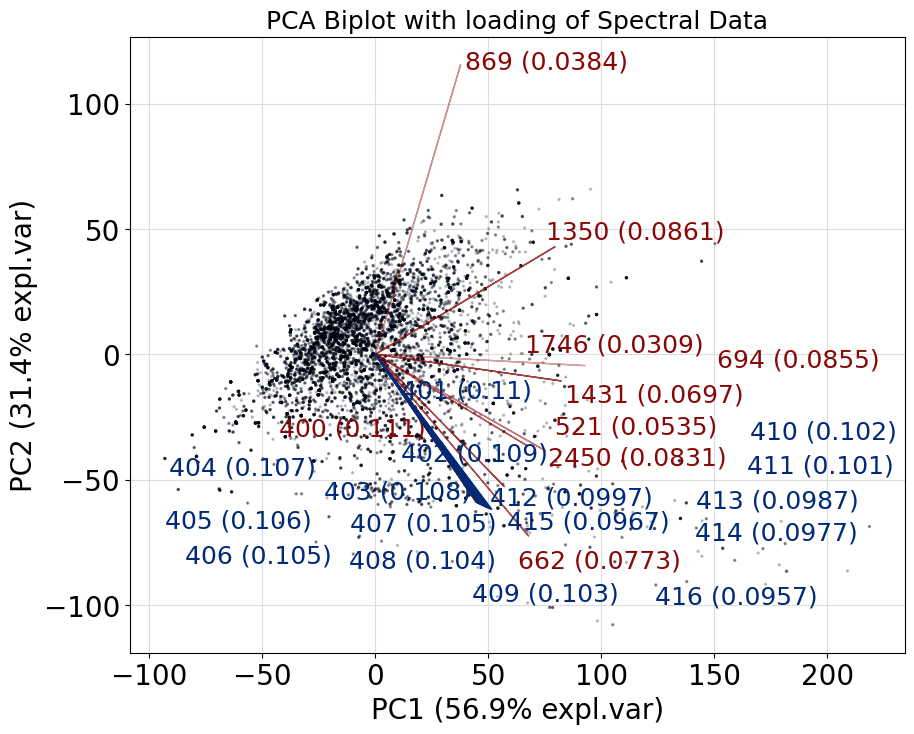

In [186]:
model.biplot(figsize=(10,8), legend=False, alpha=0.2, marker='o', s=2, title="PCA Biplot with loading of Spectral Data")
results['topfeat']

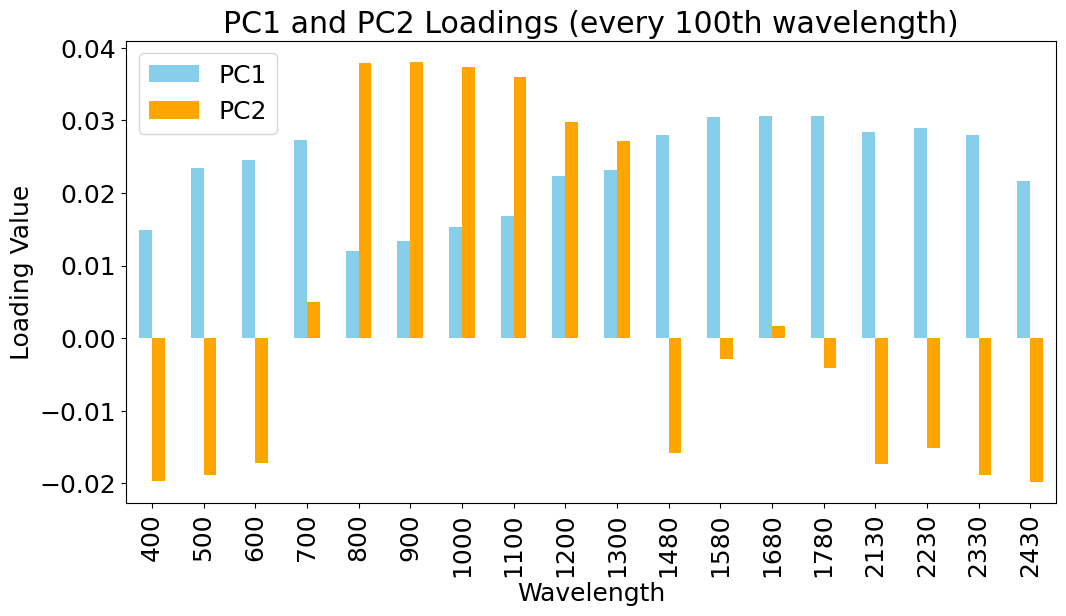

In [188]:
# Example: plot loadings for PC1
pc1_loadings = results['loadings'].loc["PC1"][::100]
pc2_loadings = results['loadings'].loc["PC2"][::100]

# Combine into a single DataFrame for easy plotting
df_plot = pd.DataFrame({
    "PC1": pc1_loadings,
    "PC2": pc2_loadings
}, index=pc1_loadings.index)  # use wavelength as index

# Plot
df_plot.plot(kind="bar", figsize=(12,6), color=["skyblue", "orange"])
plt.title("PC1 and PC2 Loadings (every 100th wavelength)")
plt.xlabel("Wavelength")
plt.ylabel("Loading Value")
plt.show()


In [210]:
# Step 6: Detailed Analysis and Interpretation
print("\n" + "="*50)
print("6. DETAILED ANALYSIS AND INTERPRETATION")
print("="*50)

# Find wavelengths with highest loadings for each PC
def analyze_pc_loadings(i, n_top):   
    loadings = results['loadings'].loc[f"PC{i}"].abs().sort_values(ascending=False).head(n_top)
    print(f"\nPC{i} - Top {n_top} influential wavelengths:")
    print("-" * 40)
    for k, v in loadings.items():
        print(f"{i+1:2d}. {k:6.1f}nm: {v:8.4f}")

# Analyze first 3 PCs
for pc in range(3):
    analyze_pc_loadings(pc+1, 5)

# Variable correlation summary
print(f"\n" + "="*50)
print("7. CORRELATION SUMMARY")
print("="*50)

# Calculate average correlation between adjacent wavelengths
adj_correlations = []
for i in range(len(bands_df.columns)-1):
    corr = bands_df.iloc[:, i].corr(bands_df.iloc[:, i+1])
    adj_correlations.append(corr)

print(f"Average correlation between adjacent wavelengths: {np.mean(adj_correlations):.4f}")
print(f"Minimum correlation between adjacent wavelengths: {np.min(adj_correlations):.4f}")
print(f"Maximum correlation between adjacent wavelengths: {np.max(adj_correlations):.4f}")

# Summary statistics
print(f"\n" + "="*50)
print("8. PCA SUMMARY")
print("="*50)

print(f"Original dimensions: {bands_df.shape}")
print(f"Total variance explained by first 3 PCs: {results['explained_var'][2]:.4f}")
print(f"Total variance explained by first 5 PCs: {results['explained_var'][4].sum():.4f}")
print(f"Components needed for 90% variance: {np.argmax(results['explained_var'] >= 0.90) + 1}")
print(f"Components needed for 95% variance: {np.argmax(results['explained_var'] >= 0.95) + 1}")
print(f"Components needed for 99% variance: {np.argmax(results['explained_var'] >= 0.99) + 1}")


6. DETAILED ANALYSIS AND INTERPRETATION

PC1 - Top 5 influential wavelengths:
----------------------------------------
 2. 1746.0nm:   0.0309
 2. 1747.0nm:   0.0309
 2. 1745.0nm:   0.0309
 2. 1748.0nm:   0.0309
 2. 1744.0nm:   0.0309

PC2 - Top 5 influential wavelengths:
----------------------------------------
 3.  869.0nm:   0.0384
 3.  870.0nm:   0.0384
 3.  868.0nm:   0.0384
 3.  871.0nm:   0.0384
 3.  867.0nm:   0.0384

PC3 - Top 5 influential wavelengths:
----------------------------------------
 4.  521.0nm:   0.0535
 4.  522.0nm:   0.0535
 4.  520.0nm:   0.0535
 4.  523.0nm:   0.0535
 4.  519.0nm:   0.0535

7. CORRELATION SUMMARY
Average correlation between adjacent wavelengths: 0.9996
Minimum correlation between adjacent wavelengths: 0.6180
Maximum correlation between adjacent wavelengths: 1.0000

8. PCA SUMMARY
Original dimensions: (12180, 1721)
Total variance explained by first 3 PCs: 0.9363
Total variance explained by first 5 PCs: 0.9673
Components needed for 90% variance:

### Pretreatment steps and plan:
- Inspect data for missing values; treat them by either removing or interpolating
- Standardise all predictor variables to remove scale effects
- Remove irrelvant or constant variables (if there are any extra variables)
- Smooth out/filter data if there is noise present
- Outlier handling by cliping